# Build a Generative Adversarial Network (GAN) to generate handwritten digits using the MNIST dataset:
# * Preprocess the data by normalizing pixel values and reshaping them to fit the model.
# * Design a generator network and a discriminator network.
# * Train the GAN for 50 epochs, saving generated images at every 10th epoch.
# * Visualize the generated digits and compare them to real ones.

In [19]:
import tensorflow as tf
(X_train,y_train), (X_test,y_test) = tf.keras.datasets.mnist.load_data()

In [20]:
import numpy as np
# Preprocess the data
X_train = X_train / 255.0  # Normalize pixel values to [0, 1]
X_train = np.expand_dims(X_train, axis=-1)  # Add a channel dimension
X_train = X_train.astype('float32')

In [21]:
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout
from tensorflow.keras.layers import BatchNormalization, Activation, LeakyReLU
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam

In [22]:
def build_generator():
    model = Sequential()
    model.add(Dense(256, input_dim=100))
    model.add(LeakyReLU(0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(512))
    model.add(LeakyReLU(0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(1024))
    model.add(LeakyReLU(0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(784, activation='tanh'))
    model.add(Reshape((28, 28, 1)))
    return model

In [23]:
def build_discriminator():
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28, 1)))
    model.add(Dense(512))
    model.add(LeakyReLU(0.2))
    model.add(Dense(256))
    model.add(LeakyReLU(0.2))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [24]:
# Build and compile the discriminator
discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy',
                      optimizer=Adam(0.0002, 0.5),
                      metrics=['accuracy'])

# Build the generator
generator = build_generator()

# The combined GAN model (stacked generator and discriminator)
z = Input(shape=(100,))
img = generator(z)
discriminator.trainable = False  # Freeze the discriminator during GAN training
validity = discriminator(img)

combined = Model(z, validity)
combined.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step  


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py:75: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


0 [D loss: 0.662969, acc.: 61.72%] [G loss: 0.656491]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


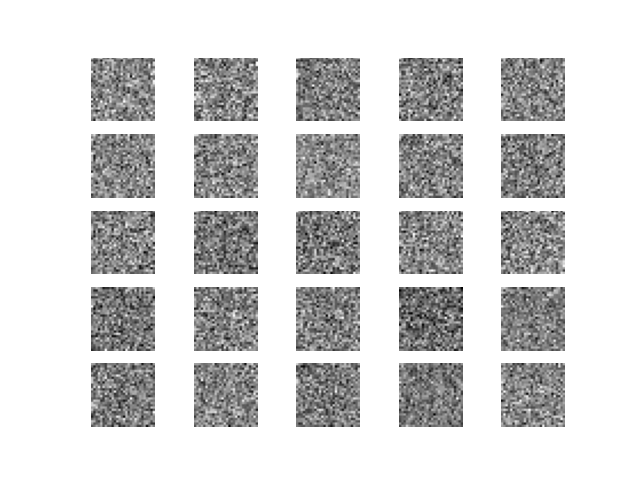

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
1 [D loss: 0.657617, acc.: 71.35%] [G loss: 0.655837]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2 [D loss: 0.655120, acc.: 72.03%] [G loss: 0.654541]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
3 [D loss: 0.656852, acc.: 72.21%] [G loss: 0.658568]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4 [D loss: 0.663291, acc.: 68.49%] [G loss: 0.665660]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
5 [D loss: 0.669611, acc.: 65.77%] [G loss: 0.673102]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6 [D loss: 0.677540, acc.: 62.86%] [G loss: 0.682311]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
7 [D loss: 0.687209, acc.: 59.95%] [G loss: 0.693207]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
8 [D loss: 0.697820, acc.: 57.35%] [G loss: 0.704221]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
9 [D loss: 0.709244, acc.: 55.63%] [G loss: 0.717607]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
10 [D loss: 0.723695, acc.: 53.50%] [G loss: 0.731601]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


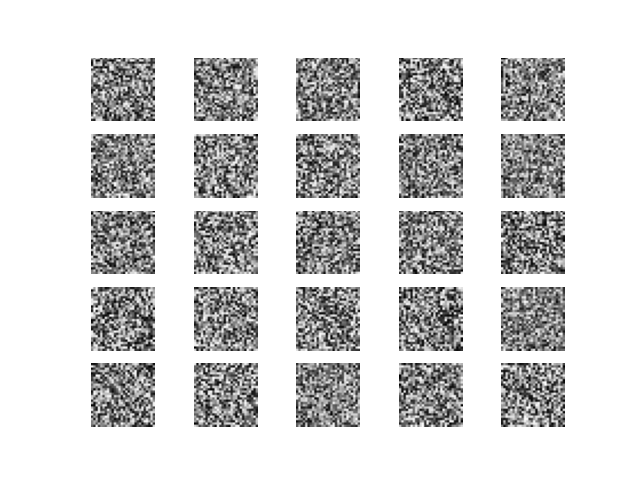

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
11 [D loss: 0.737132, acc.: 51.60%] [G loss: 0.745364]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
12 [D loss: 0.751427, acc.: 50.16%] [G loss: 0.760439]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
13 [D loss: 0.765344, acc.: 48.87%] [G loss: 0.773892]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
14 [D loss: 0.778975, acc.: 47.82%] [G loss: 0.787878]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
15 [D loss: 0.793773, acc.: 46.70%] [G loss: 0.803312]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
16 [D loss: 0.808283, acc.: 45.98%] [G loss: 0.817532]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
17 [D loss: 0.821622, acc.: 45.18%] [G loss: 0.830061]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
18 [D loss: 0.834590, acc.: 44.45%] [G loss: 0.843372]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
19 [D loss: 0.848382, acc.: 43.91%] [G loss: 0.858043]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
20 [D loss: 0.862558, acc.: 43.37%] [G loss: 0.871708]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


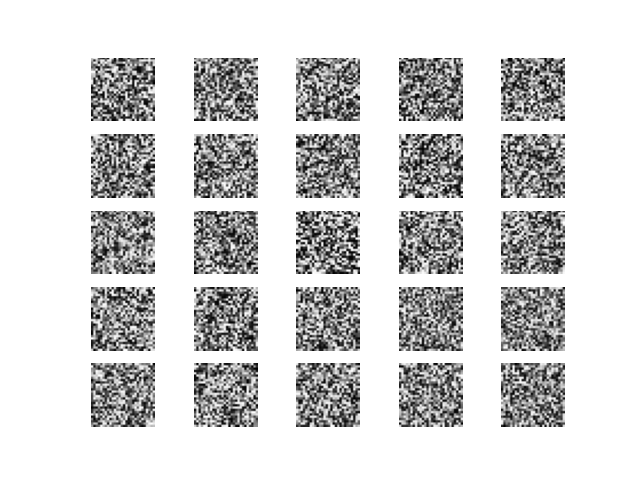

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
21 [D loss: 0.876353, acc.: 42.99%] [G loss: 0.886270]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
22 [D loss: 0.890710, acc.: 42.52%] [G loss: 0.900251]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
23 [D loss: 0.904416, acc.: 42.15%] [G loss: 0.913614]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
24 [D loss: 0.918476, acc.: 41.77%] [G loss: 0.928580]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
25 [D loss: 0.933179, acc.: 41.31%] [G loss: 0.942814]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
26 [D loss: 0.946936, acc.: 41.07%] [G loss: 0.956572]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
27 [D loss: 0.960347, acc.: 40.68%] [G loss: 0.969401]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
28 [D loss: 0.973411, acc.: 40.34%] [G loss: 0.982714]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
29 [D loss: 0.986419, acc.: 40.10%] [G loss: 0.995594]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
30 [D loss: 1.000159, acc.: 39.83%] [G loss: 1.010017]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


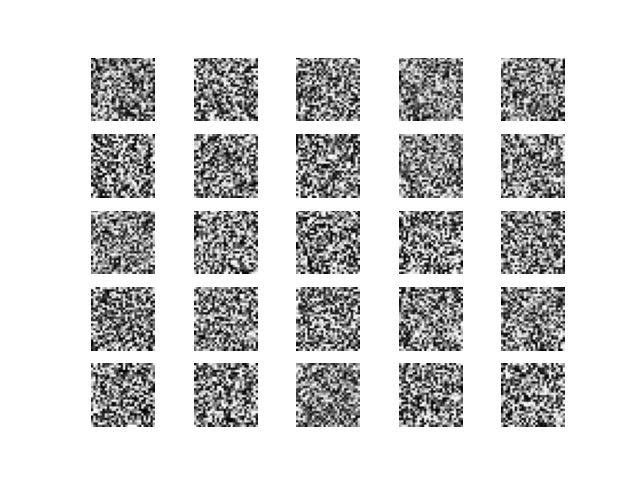

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
31 [D loss: 1.013302, acc.: 39.69%] [G loss: 1.022124]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
32 [D loss: 1.025468, acc.: 39.56%] [G loss: 1.034433]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
33 [D loss: 1.038038, acc.: 39.37%] [G loss: 1.046964]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
34 [D loss: 1.050250, acc.: 39.21%] [G loss: 1.059213]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
35 [D loss: 1.062563, acc.: 39.13%] [G loss: 1.071613]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
36 [D loss: 1.074738, acc.: 39.01%] [G loss: 1.083563]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
37 [D loss: 1.086479, acc.: 38.87%] [G loss: 1.095093]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
38 [D loss: 1.098053, acc.: 38.77%] [G loss: 1.106676]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
39 [D loss: 1.109914, acc.: 38.67%] [G loss: 1.118710]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
40 [D loss: 1.121913, acc.: 38.54%] [G loss: 1.130853]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


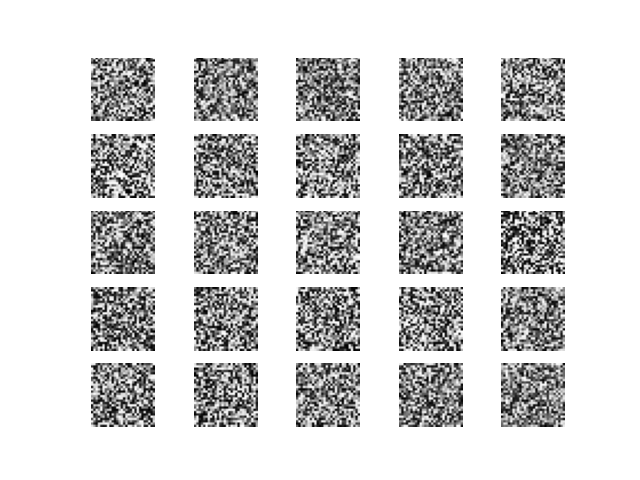

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
41 [D loss: 1.134437, acc.: 38.34%] [G loss: 1.143507]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
42 [D loss: 1.146104, acc.: 38.17%] [G loss: 1.154392]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
43 [D loss: 1.156782, acc.: 38.07%] [G loss: 1.164880]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
44 [D loss: 1.167617, acc.: 37.96%] [G loss: 1.175879]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
45 [D loss: 1.178205, acc.: 37.89%] [G loss: 1.186188]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
46 [D loss: 1.188793, acc.: 37.82%] [G loss: 1.197086]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
47 [D loss: 1.199921, acc.: 37.68%] [G loss: 1.208235]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
48 [D loss: 1.210823, acc.: 37.61%] [G loss: 1.218965]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
49 [D loss: 1.221686, acc.: 37.55%] [G loss: 1.229925]


In [25]:
epochs = 50
batch_size = 128
noise_dim = 100

for epoch in range(epochs):
    idx = np.random.randint(0, X_train.shape[0], batch_size)
    imgs = X_train[idx]

    # Sample noise and generate a batch of new images
    noise = np.random.normal(0, 1, (batch_size, noise_dim))
    gen_imgs = generator.predict(noise)

    # Train the discriminator (real classified as 1 and generated as 0)
    d_loss_real = discriminator.train_on_batch(imgs, np.ones((batch_size, 1)))
    d_loss_fake = discriminator.train_on_batch(gen_imgs, np.zeros((batch_size, 1)))
    d_loss = 0.5 * np.add(d_loss_real[0], d_loss_fake[0]) # Extract the loss values from the lists

    # Train the generator (wants discriminator to mistake images as real)
    g_loss = combined.train_on_batch(noise, np.ones((batch_size, 1)))

    # Plot the progress
    print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss, 100*d_loss_real[1], g_loss[0])) # Access the loss from the g_loss list

    if epoch % 10 == 0:
      save_imgs(epoch)

In [28]:
%matplotlib inline

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Generate images
num_images = 10  # Number of images to generate
noise = np.random.normal(0, 1, (num_images, noise_dim))
generated_images = generator.predict(noise)

# Rescale pixel values to the range [0, 1]
generated_images = 0.5 * generated_images + 0.5

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


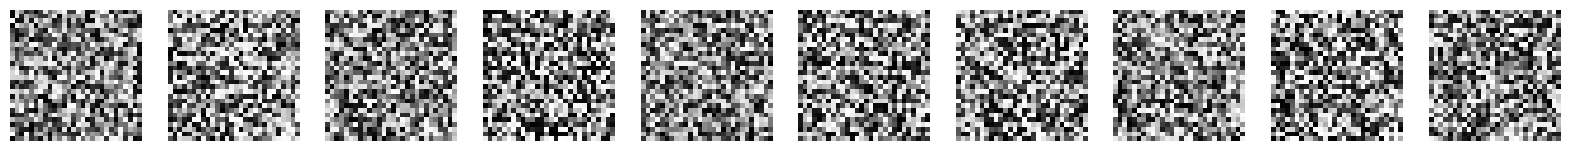

In [34]:
# Display generated images
fig, axes = plt.subplots(1, num_images, figsize=(20, 2))
for i in range(num_images):
    axes[i].imshow(generated_images[i, :, :, 0], cmap='gray')
    axes[i].axis('off')
plt.show()

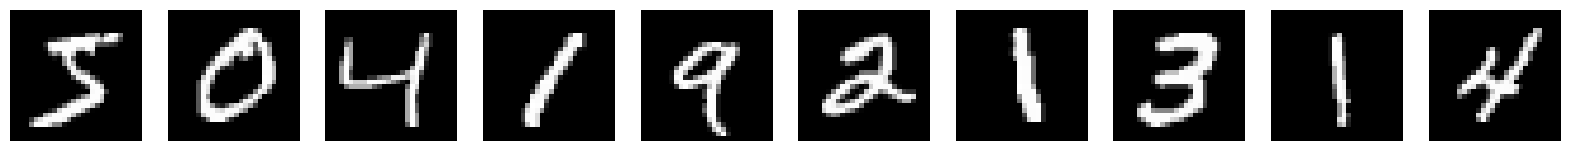

In [35]:
# Display some real MNIST images for comparison
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
num_images = 10
fig, axes = plt.subplots(1, num_images, figsize=(20, 2))
for i in range(num_images):
    axes[i].imshow(X_train[i], cmap='gray')
    axes[i].axis('off')
plt.show()